<a href="https://colab.research.google.com/github/Fernanda-a/MMEE/blob/main/MMEE_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import math

def calculate_sk(p=2, n=1, k_max=100):
    sk = 0.0
    terms = []

    for k in range(1, k_max + 1):

        pos_start = 2*(k-1)*p + 1
        pos_end = 2*k*p - 1
        positive_sum = sum(1/m for m in range(pos_start, pos_end + 1, 2))

        neg_start = 2*(k-1)*n + 2
        neg_end = 2*k*n
        negative_sum = sum(1/m for m in range(neg_start, neg_end + 1, 2))

        sk += positive_sum - negative_sum
        terms.append(sk)

    return terms


p, n = 2, 1
S = math.log(2) + 0.5 * math.log(p/n)

#Sk = 100
s_terms = calculate_sk(p, n, 100)
s_100 = s_terms[-1]
error = S - s_100

print(f"Valor de s_100: {s_100:.6f}")
print(f"Valor de S: {S:.6f}")
print(f"Erro S - s_100: {error:.6f}")

Valor de s_100: 1.037225
Valor de S: 1.039721
Erro S - s_100: 0.002495


Menor k com |e_k| < 0.0001: 2500


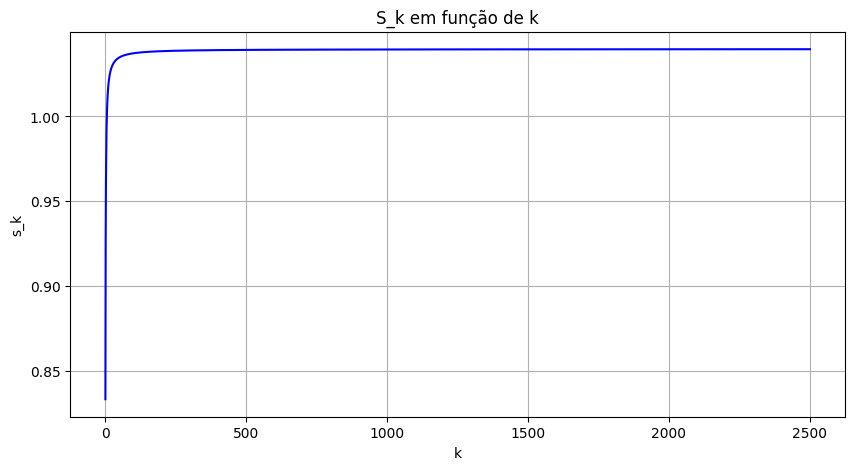

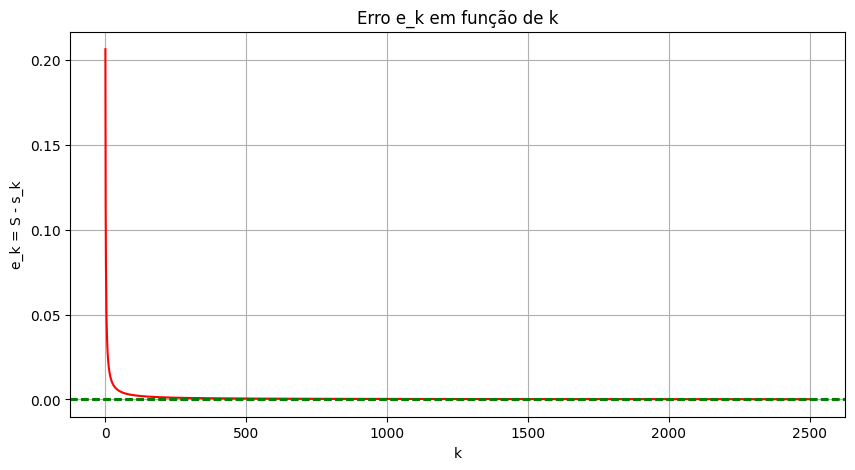

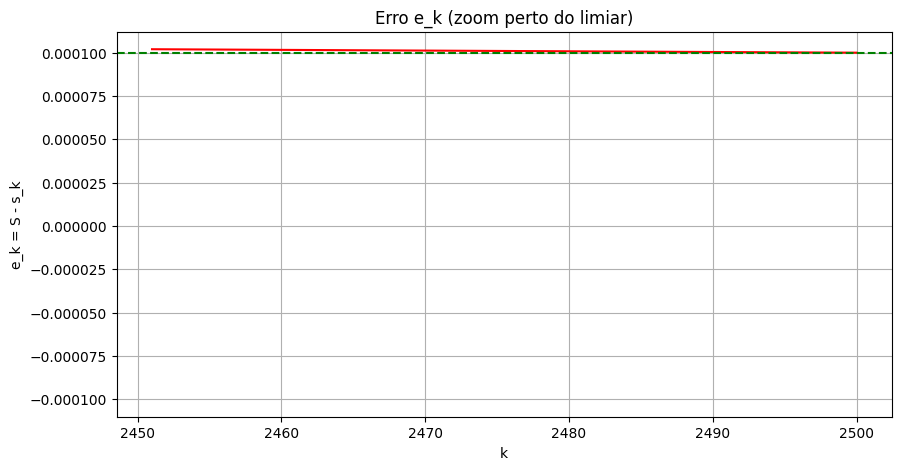

In [23]:
import matplotlib.pyplot as plt

def find_min_k(p=2, n=1, tolerance=1e-4):
    k = 1
    sk = 0.0
    S = math.log(2) + 0.5 * math.log(p/n)
    errors = []
    sk_values = []

    while True:

        pos_start = 2*(k-1)*p + 1
        pos_end = 2*k*p - 1
        positive_sum = sum(1/m for m in range(pos_start, pos_end + 1, 2))


        neg_start = 2*(k-1)*n + 2
        neg_end = 2*k*n
        negative_sum = sum(1/m for m in range(neg_start, neg_end + 1, 2))

        sk += positive_sum - negative_sum
        ek = S - sk

        sk_values.append(sk)
        errors.append(ek)

        if abs(ek) < tolerance:
            break

        k += 1

    return k, sk_values, errors

# Menor valor de k para o erro determinado
min_k, sk_values, errors = find_min_k()
print(f"Menor k com |e_k| < 0.0001: {min_k}")

# Plot s_k x k
plt.figure(figsize=(10, 5))
plt.plot(range(1, min_k + 1), sk_values, 'b-')
plt.xlabel('k')
plt.ylabel('s_k')
plt.title('S_k em função de k')
plt.grid(True)
plt.savefig('sk_convergence.png')
plt.show()
plt.close()

# Plot e_k x k
plt.figure(figsize=(10, 5))
plt.plot(range(1, min_k + 1), errors, 'r-')
plt.axhline(y=0.0001, color='g', linestyle='--')
plt.axhline(y=-0.0001, color='g', linestyle='--')
plt.xlabel('k')
plt.ylabel('e_k = S - s_k')
plt.title('Erro e_k em função de k')
plt.grid(True)
plt.savefig('error_convergence.png')
plt.show()
plt.close()

#Zoom no limiar
zoom_start = max(0, min_k - 50)
plt.figure(figsize=(10, 5))
plt.plot(range(zoom_start + 1, min_k + 1), errors[zoom_start:], 'r-')
plt.axhline(y=0.0001, color='g', linestyle='--')
plt.axhline(y=-0.0001, color='g', linestyle='')
plt.xlabel('k')
plt.ylabel('e_k = S - s_k')
plt.title('Erro e_k (zoom perto do limiar)')
plt.grid(True)
plt.savefig('error_zoom.png')
plt.show()
plt.close()